In [ ]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
import numpy as np

#from sklearn.datasets.samples_generator import (make_blobs,
#                                               make_circles,
#                                                make_moons)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV





from warnings import filterwarnings


from google.colab import drive
from sklearn.metrics import silhouette_score

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:

# Import the data
df = pd.read_csv("/content/gdrive/MyDrive/OLD_data_eeg_in_csv.csv")

df.head()


,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2,label
0,0.949867,-0.412790,-0.322089,0.751464,1.817943,1.433026,0.689987,-1.054576,-0.381360,-0.237432,0.610876,0.807887,-0.387744,0.836812,0.031605,0.180892,0.713202,Biscuit
1,-1.438008,-0.619738,-1.026245,-0.856272,-0.683106,-0.478521,0.074579,-1.367111,-0.474807,-0.182218,-0.561408,-1.596942,-1.876672,0.168698,-0.243984,0.033856,-1.331574,Biscuit
2,-1.473790,-0.968607,-1.147936,0.967766,0.324674,0.510022,0.345058,-0.929844,-0.844814,-0.824933,-0.936504,-0.546616,-0.033366,0.165388,-0.772637,-0.966099,0.024178,Biscuit
3,-0.172934,1.165387,1.207597,1.366681,0.932849,0.162062,-0.569059,-0.857833,0.891493,1.323472,0.894634,0.554903,-0.872456,-0.683542,-0.588627,-2.013185,-1.028050,Biscuit
4,0.367294,0.017011,-1.681696,-0.910858,-0.515992,-0.315080,0.925285,-0.210909,0.425723,0.070810,-1.161866,1.156145,-0.034877,0.933107,-0.123902,1.200219,0.547526,Biscuit


In [ ]:
df.shape
#160 row, 18 columns 

(160, 18)

In [ ]:
X = df.drop('label',axis=1).values
y = df['label'].values


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)


In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

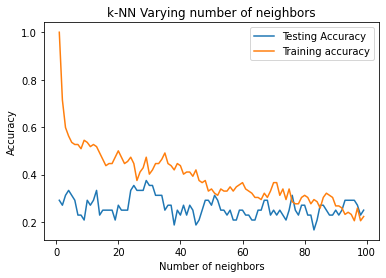

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors 
#after hypertuning we found out that 29 neighbor is the best result we can have
knn = KNeighborsClassifier(n_neighbors=29)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print("KNN Score: ", knn.score(X_test,y_test))

KNN Score:  0.375


In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)


array([[5, 3, 2, 2],
       [5, 4, 3, 0],
       [2, 3, 4, 3],
       [3, 2, 2, 5]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,Bed,Biscuit,Drink,Toilet,All
True,,,,,
Bed,5,3,2,2,12
Biscuit,5,4,3,0,12
Drink,2,3,4,3,12
Toilet,3,2,2,5,12
All,15,12,11,10,48


In [ ]:
print ("Using KNN")

print(classification_report(y_test,y_pred))


Using KNN
              precision    recall  f1-score   support

         Bed       0.33      0.42      0.37        12
     Biscuit       0.33      0.33      0.33        12
       Drink       0.36      0.33      0.35        12
      Toilet       0.50      0.42      0.45        12

    accuracy                           0.38        48
   macro avg       0.38      0.38      0.38        48
weighted avg       0.38      0.38      0.38        48



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='label')


#fprate, tprate, thresholds = roc_curve(test_Y, pred_y)
#fprate, tprate, thresholds = roc_curve(test_Y, pred_y, pos_label='your_label')


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


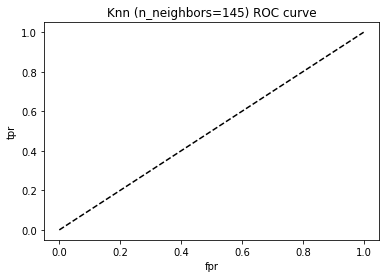

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn (n_neighbors=145) ROC curve')
plt.show()

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}


In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.375

In [ ]:
knn_cv.best_params_


{'n_neighbors': 31}